In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"]=15,10

## Cargamos los datos informados por el Ministerios de Ciencia

In [29]:
url  = "https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto5/TotalesNacionales.csv"
data = pd.read_csv(url)
data = data.rename(columns={"Fecha": "Item"}) #Le cambiamos el nombre a la columna

In [30]:
data.head()

,Item,2020-03-03,2020-03-04,2020-03-05,2020-03-06,2020-03-07,2020-03-08,2020-03-09,2020-03-10,2020-03-11,...,2020-04-22,2020-04-23,2020-04-24,2020-04-25,2020-04-26,2020-04-27,2020-04-28,2020-04-29,2020-04-30,2020-05-01
0,Casos nuevos con sintomas,0.0,2.0,1.0,1.0,2.0,3.0,5.0,2.0,6.0,...,464.0,516.0,494.0,552.0,473.0,482.0,552.0,520,780,882
1,Casos totales,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,11296.0,11812.0,12306.0,12858.0,13331.0,13813.0,14365.0,15135,16023,17008
2,Casos recuperados,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5386.0,5804.0,6327.0,6746.0,7024.0,7327.0,7710.0,8057,8580,9018
3,Fallecidos,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,160.0,168.0,174.0,181.0,189.0,198.0,207.0,216,227,234
4,Casos activos,1.0,3.0,4.0,5.0,7.0,10.0,15.0,17.0,23.0,...,5750.0,5840.0,5805.0,5931.0,6118.0,6288.0,6448.0,6862,7216,7756


In [23]:
def labelonbars(X, Y):
    n = len(X)
    for i in range (n):
        number = '{:,}'.format(int(Y[i])).replace(',', '.')
        plt.annotate(
            number, xy=(X[i], Y[i]),
            xytext =(0, 10),
            textcoords="offset points",
            ha ='center', va='bottom')
        
def Graph(name_item):
    data_by_item = data[(data.Item == name_item)].values
    Y            = np.delete(data_by_item, 0)
    X            = data.columns[1:]
    plt.plot(X, Y, 'b')
    plt.plot(X, Y, 'bo')
    labelonbars([X[len(X)-1]], [Y[len(X)-1]])
    plt.xlabel('Fecha')
    plt.ylabel(name_item)
    plt.title(name_item)
    plt.grid()
    plt.xticks(X, rotation='vertical')
    plt.show()

## Casos totales

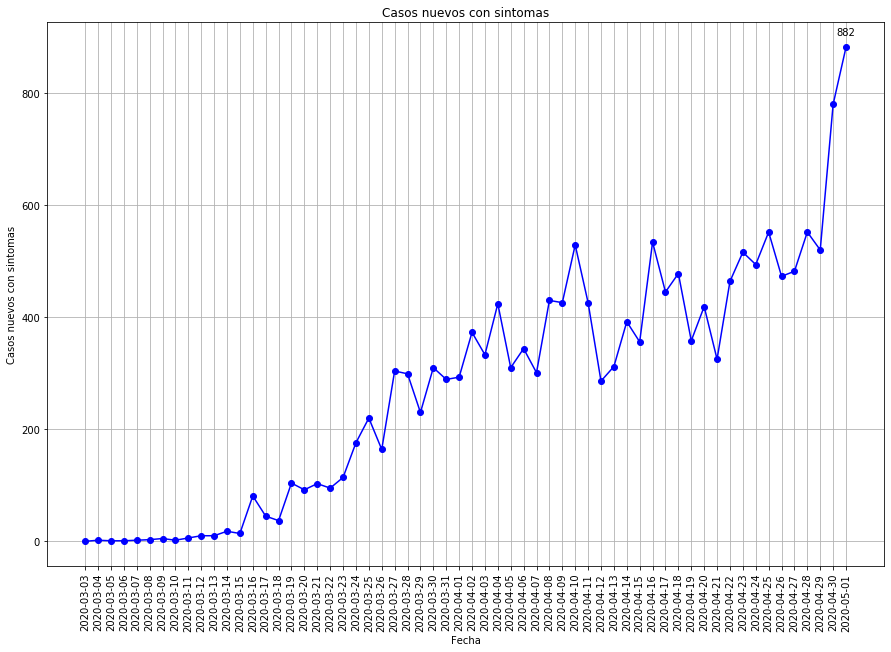

In [24]:
Graph("Casos nuevos con sintomas")

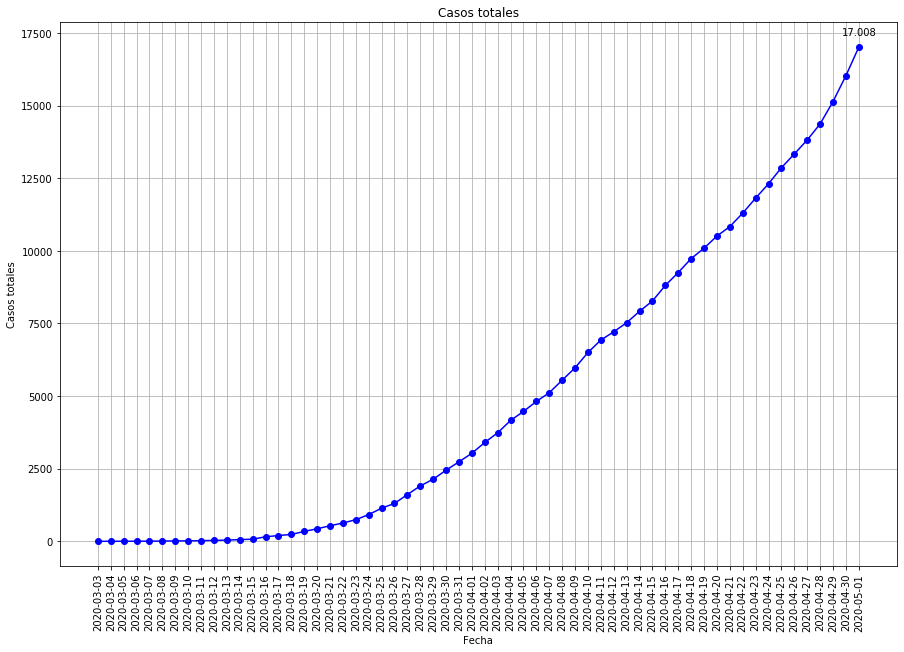

In [25]:
Graph("Casos totales")

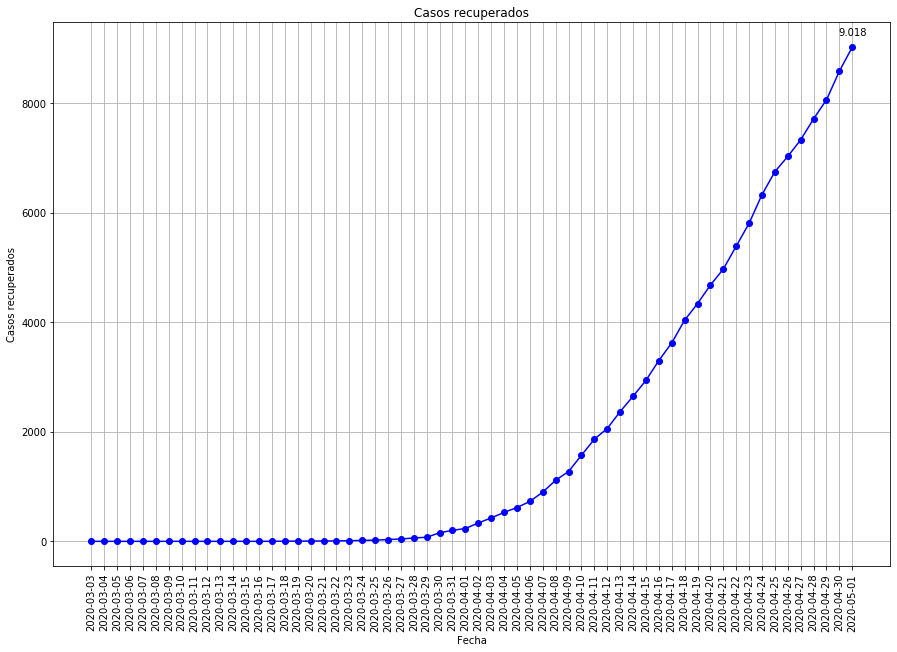

In [26]:
Graph("Casos recuperados")

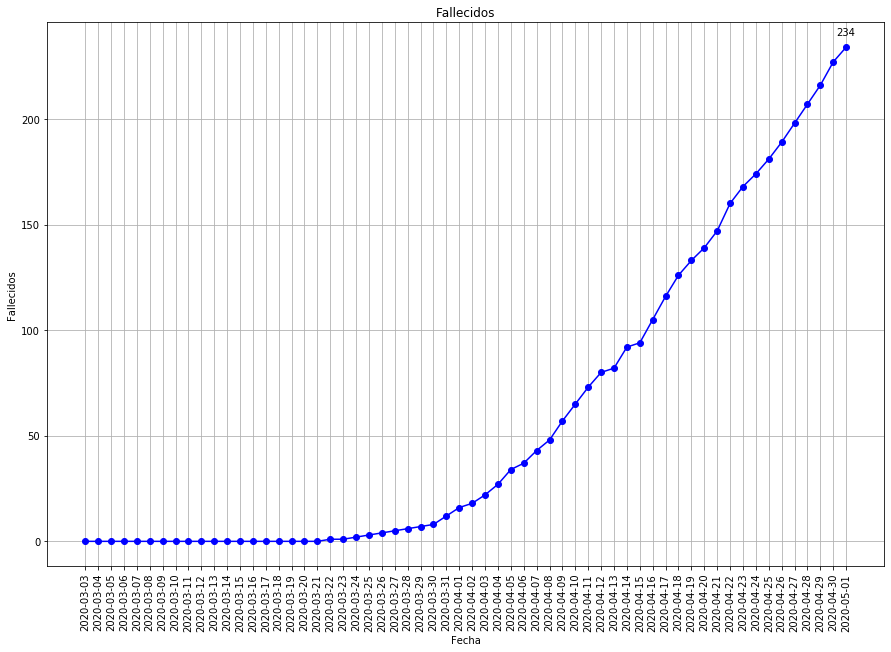

In [27]:
Graph("Fallecidos")

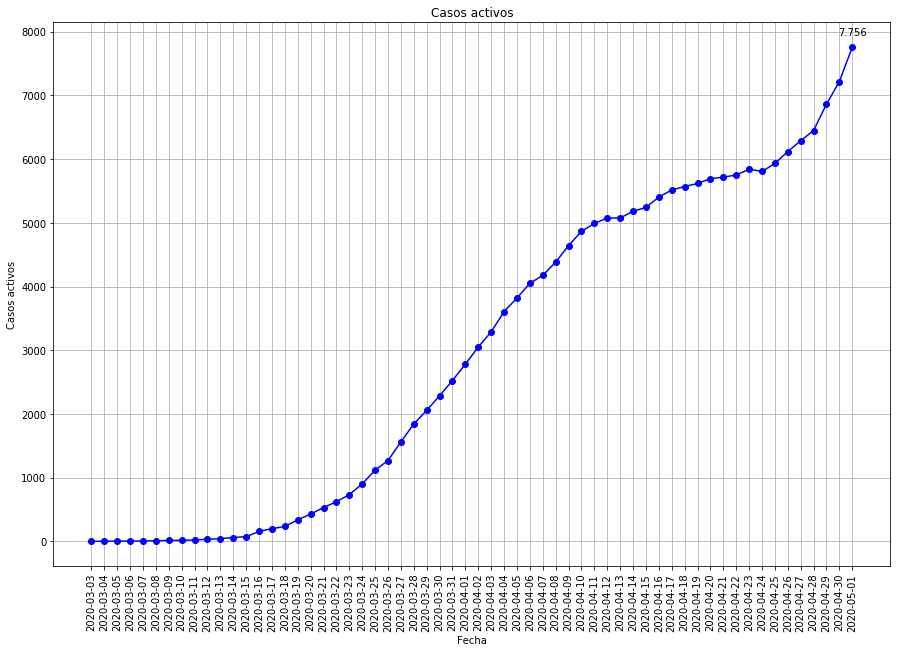

In [28]:
Graph("Casos activos")